Test whether a gaussian model N($\mu$, $\sigma$) for the age distribution of citibike drivers is a sensible model, 
or if you can find a better fit with another distribution. 

- Use 2 tests: KS, AD, KL, chisq (even though we have not talked about it in detail yet) to do this. 

- Test at the Normal and a least one other distributions (e.g. Poisson, or Binomial, or Chisq, Lognormal.......)

No skeleton: you are on your own!


__Extra credit__: Divide your sample geographically: 
by Borrow + split Manhattan in an Uptown and a Downtown sample (use your discretion to do so, but ZIP code is a good idea) 
and see if you notice any differences in how the age distribution can be modeled. 


### GRADING: 

Your notebook must: 
- state the $H_0$ correcty
- generate the distributions correctly.
- use the test correctly
- make conclusions about the rejection of the Null
- each plot must have a caption which describes the plot in terms of Central Limit Theorem

In [59]:
#from __future__ import print_function, division
import numpy as np
import pylab as pl
import pandas as pd
import scipy.stats as stats
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

import os
import json
#s = json.load( open(os.getenv('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

import statsmodels.api as sm
import statsmodels.formula.api as smf
np.random.seed(99)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [60]:
#get data for may and june 2016
datestring = '201505'
datestring2 = '201506'
getCitiBikeCSV(datestring)
getCitiBikeCSV(datestring2)

('Downloading', '201505')
file in place, you can continue
('Downloading', '201506')
file in place, you can continue


In [61]:
df_may = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df_june = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')

In [62]:
df_1 = df_may.append(df_june, ignore_index=True)

print df_1.head()
print df_1.tail()

   tripduration          starttime           stoptime  start station id  \
0           415  5/1/2015 00:00:11  5/1/2015 00:07:06               477   
1          1523  5/1/2015 00:00:28  5/1/2015 00:25:52               293   
2           642  5/1/2015 00:00:52  5/1/2015 00:11:35               380   
3           367  5/1/2015 00:00:48  5/1/2015 00:06:55               537   
4          2734  5/1/2015 00:00:51  5/1/2015 00:46:26               426   

        start station name  start station latitude  start station longitude  \
0          W 41 St & 8 Ave               40.756405               -73.990026   
1    Lafayette St & E 8 St               40.730287               -73.990765   
2         W 4 St & 7 Ave S               40.734011               -74.002939   
3  Lexington Ave & E 24 St               40.740259               -73.984092   
4    West St & Chambers St               40.717548               -74.013221   

   end station id          end station name  end station latitude  \
0    

In [63]:
df_1.columns
df_1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,415,5/1/2015 00:00:11,5/1/2015 00:07:06,477,W 41 St & 8 Ave,40.756405,-73.990026,442,W 27 St & 7 Ave,40.746647,-73.993915,17012,Subscriber,1981.0,1
1,1523,5/1/2015 00:00:28,5/1/2015 00:25:52,293,Lafayette St & E 8 St,40.730287,-73.990765,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,17390,Customer,NaN,0
2,642,5/1/2015 00:00:52,5/1/2015 00:11:35,380,W 4 St & 7 Ave S,40.734011,-74.002939,507,E 25 St & 2 Ave,40.739126,-73.979738,15003,Subscriber,1990.0,1
3,367,5/1/2015 00:00:48,5/1/2015 00:06:55,537,Lexington Ave & E 24 St,40.740259,-73.984092,280,E 10 St & 5 Ave,40.733320,-73.995101,14788,Subscriber,1978.0,1
4,2734,5/1/2015 00:00:51,5/1/2015 00:46:26,426,West St & Chambers St,40.717548,-74.013221,327,Vesey Pl & River Terrace,40.715338,-74.016584,21068,Subscriber,1956.0,2


In [64]:
#df is the dataframe where the content of the csv file is stored
df_1['age'] = 2015 - df_1['birth year'][(df_1['usertype'] == 'Subscriber')]

In [65]:
#dropping some data I no longer need
df_1 = df_1[['birth year', 'age', 'starttime', 'stoptime', 'usertype']]
df_1.head()

,birth year,age,starttime,stoptime,usertype
0,1981.0,34.0,5/1/2015 00:00:11,5/1/2015 00:07:06,Subscriber
1,NaN,NaN,5/1/2015 00:00:28,5/1/2015 00:25:52,Customer
2,1990.0,25.0,5/1/2015 00:00:52,5/1/2015 00:11:35,Subscriber
3,1978.0,37.0,5/1/2015 00:00:48,5/1/2015 00:06:55,Subscriber
4,1956.0,59.0,5/1/2015 00:00:51,5/1/2015 00:46:26,Subscriber


In [66]:
# dropping NaN values
df_1['age'].dropna(inplace= True)
df_1.head()

,birth year,age,starttime,stoptime,usertype
0,1981.0,34.0,5/1/2015 00:00:11,5/1/2015 00:07:06,Subscriber
1,NaN,NaN,5/1/2015 00:00:28,5/1/2015 00:25:52,Customer
2,1990.0,25.0,5/1/2015 00:00:52,5/1/2015 00:11:35,Subscriber
3,1978.0,37.0,5/1/2015 00:00:48,5/1/2015 00:06:55,Subscriber
4,1956.0,59.0,5/1/2015 00:00:51,5/1/2015 00:46:26,Subscriber


In [67]:
#create a normal distribution with citibike params
mean_age = df_1.age.mean()
std_age = df_1.age.std()
hg = sorted(df_1.age)
age_normal_dist = stats.norm.pdf(hg, np.mean(hg), np.std(hg))

In [68]:
#create a poisson distribution with citibike params
age_poisson_dist = np.random.poisson(mean_age, len(df_1))

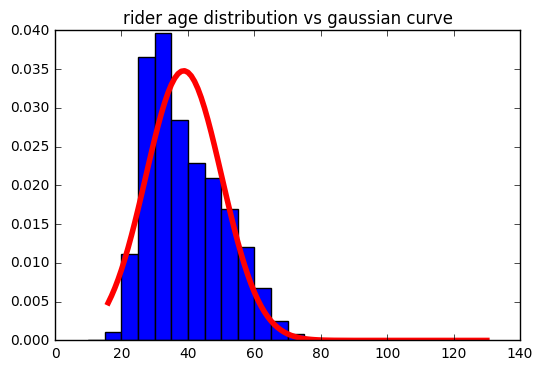

In [69]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)

pl.hist(df_1.age, bins, normed = 1)
pl.title("rider age distribution vs gaussian curve")

plt.plot(hg, age_normal_dist, linewidth = 4, color = 'red', label = 'Gaussian Curve')
#plt.plot(x, scipy.stats.poisson.pmf(x, mean_age, loc=0))

In the graph above, citibike rider pdf is plotted against the pdf for a gaussian curve with the same mean and standard deviation. If one drew random samples of citibike riders' ages and computed the average age of those samples, that distribution of random ages should follow the red gaussian curve, according to the central limit theorem.

H0: The citibike age distribution for may and june of 2015 rides is normally distributed at a significance level of 5%.

# Kolmogorov–Smirnov test - Gaussian

In [70]:
#compare normal with actual citibike data with KS test

ks = stats.ks_2samp(df_1.age, age_normal_dist)
print (ks)

Ks_2sampResult(statistic=0.9999999999685809, pvalue=0.0)


From the code above, you can see that the k statistic is large and the pvalue is essentially zero, meaning the null is rejected, and the citibike age distribution is NOT normally distributed at a significance level of 5%.

# Anderson–Darling test - Gaussian

In [71]:
#compare normal with actual citibike data with AD test
ad = stats.anderson(df_1.age, dist='norm')
print (ad)

AndersonResult(statistic=22174.319962217938, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


From the code above, you can see that the AD statistic is much larger than the critical values at even the 1% level, meaning the null is rejected, and the citibike age distribution is NOT normally distributed at a significance level of 5%.

H0: The citibike age distribution for may and june of 2015 rides is a poisson distribution at a significance level of 5%.

# Kolmogorov–Smirnov test - Poisson

In [72]:
#compare poisson with actual citibike data with KS test
ks_p = stats.ks_2samp(df_1.age, age_poisson_dist)
print (ks_p)

Ks_2sampResult(statistic=0.2181823104646112, pvalue=0.0)


From the code above, you can see that the k statistic is large and the pvalue is essentially zero, meaning the null is rejected, and the citibike age distribution is NOT a poisson distribution at a significance level of 5%.

# Anderson–Darling test - Gumbel

In [73]:
#compare poisson with actual citibike data with AD test
ad_p = stats.anderson(df_1.age, dist='gumbel')
print (ad_p)

AndersonResult(statistic=inf, critical_values=array([ 0.474,  0.637,  0.757,  0.877,  1.038]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ]))


From the code above, you can see that the AD statistic is infinite and the pvalue is zero, meaning the null is rejected, and the citibike age distribution is NOT a gumbel distribution at a significance level of 5%. (For some reason, A-D doesn't support Poisson?)